In [ ]:
# for unzipping the zip file run this
#!unzip '/content/drive/MyDrive/Deepfake/deepfake.zip' -d "/content/drive/MyDrive/Deepfake/"

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Building a deepfake image detection model which is capable of classifying image into two categories Ai-Genrated or Real image using TensorFlow

# Problem Definition
* The model is used for detection of deepfake or Ai-generated images that
  are now widly used for spreading hate speech and fake news.

# Data
* We are using Kaggle data  uploaded on the drive and will also upload     zip file on github  <i>refer https://github.com/vrmaverick/DeepFake_Detector </i>

# Evaluation

* Prediction Probalities should be more than 90% which is this projects goal to acheive

# Features

* Few key information abot features as the project is based on image classification which are unstructured, Thus there is no such distinctive feature but the data is divide into 3 parts . Testing,Training and Validation. and the model will be a binary classifier

In [26]:
# Importing all required tools
import tensorflow as tf
import tensorflow_hub as hub

# For Data Structuring
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# File Handling
import os

In [3]:
print("TF Version",tf.__version__)
print("TF hub version :",hub.__version__)

TF Version 2.15.0
TF hub version : 0.16.0


# Checking for GPU accessibility
Can change runtime type if needed on  google collab


In [4]:
print("GPU available"if tf.config.list_physical_devices("GPU")else "Not Available")

GPU available


# Defining all the Functions that are used in the notebook further

In [36]:
# Generating file paths for images
def paths(p):
  # Specify the folder path within your Google Drive
  folder_path = p
  # List files in the folder
  file_paths = []
  file_name = []
  for root, dirs, files in os.walk(folder_path):
      for file in files:
          file_paths.append(os.path.join(root, file))
          file_name.append(file)
          print(f"File Path: {os.path.join(root, file)}")
  return file_paths,file_name


# Getting our data ready

*Turning our images to tensors or numerical format*

To check if image exists on that path run the cell below else one may skip it

In [ ]:
!ls '/content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE/1069 (10).jpg'

^C


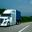

In [9]:
# Can be used for displaying images
from IPython.display import Image
Image('/content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE/1069 (10).jpg')

# Getting image paths and labels

In [30]:
# Accessing File paths of Ai Generated images which will be used for training
file_paths,file_name = paths('/content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE')

Streaming output truncated to the last 5000 lines.
File Path: /content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE/2918 (6).jpg
File Path: /content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE/2897 (4).jpg
File Path: /content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE/2896 (3).jpg
File Path: /content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE/2855 (9).jpg
File Path: /content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE/2920 (4).jpg
File Path: /content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE/2932 (7).jpg
File Path: /content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE/2925 (10).jpg
File Path: /content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE/2970 (2).jpg
File Path: /content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE/2870 (10).jpg
File Path: /content/drive/MyD

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [31]:
len(file_paths)

37800

In [32]:
len(file_name)

37800

In [44]:
# Creating a DataFrame for Convinience
df = pd.DataFrame(file_name, columns=['Image'])
df['Class']='Fake'
df.head()

,Image,Class
0,0838 (5).jpg,Fake
1,0956 (3).jpg,Fake
2,0890 (7).jpg,Fake
3,0842 (8).jpg,Fake
4,0911 (6).jpg,Fake


In [39]:
# Accessing File paths of Real images which will be used for training
file_paths,file_name = paths('/content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/test/REAL')


Streaming output truncated to the last 5000 lines.
File Path: /content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/test/REAL/0363 (3).jpg
File Path: /content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/test/REAL/0317 (2).jpg
File Path: /content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/test/REAL/0339 (2).jpg
File Path: /content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/test/REAL/0360.jpg
File Path: /content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/test/REAL/0404 (4).jpg
File Path: /content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/test/REAL/0344 (5).jpg
File Path: /content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/test/REAL/0314 (9).jpg
File Path: /content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/test/REAL/0339 (9).jpg
File Path: /content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/test/REAL/0421 (5).jpg
File Path: /content/drive/MyDrive/Deepfake/A

In [45]:
print(len(file_name))
new_data = pd.DataFrame(file_name, columns=['Image'])
new_data['Class'] = 'REAL'
resulting_data = pd.concat([df, new_data], ignore_index=True)
del new_data
resulting_data

10000


,Image,Class
0,0838 (5).jpg,Fake
1,0956 (3).jpg,Fake
2,0890 (7).jpg,Fake
3,0842 (8).jpg,Fake
4,0911 (6).jpg,Fake
...,...,...
19995,0134 (8).jpg,REAL
19996,0049 (6).jpg,REAL
19997,0103 (8).jpg,REAL
19998,0055 (8).jpg,REAL


In [47]:
resulting_data['Class'].value_counts()

Fake    10000
REAL    10000
Name: Class, dtype: int64

In [48]:
resulting_data.to_csv('//content/drive/MyDrive/Deepfake/Test_Info.csv', index=False)